### Subject: AI Enterprise Systems
### Student: Wenping Wang
###  Project Name: Fish
### Professor: Sajeeva
### Durham College

### 1. Loading Libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
# import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,  KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
 

In [3]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf
print(tf.__version__)

1.14.0


In [4]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### 2. Loading Dataset

In [5]:
df = pd.read_csv('Fish.csv')

### 3. Analyze Data

In [6]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [25]:
# to check if there is any null value and to know the type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


c:\Users\benja\anaconda3\envs\ML_PY37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: name 'plt' is not defined

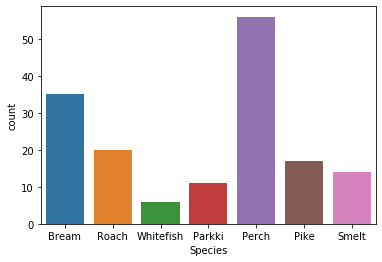

In [26]:
# Count of Target data to see if there is any unbalance of data
sns.countplot(df['Species'])
plt.show()

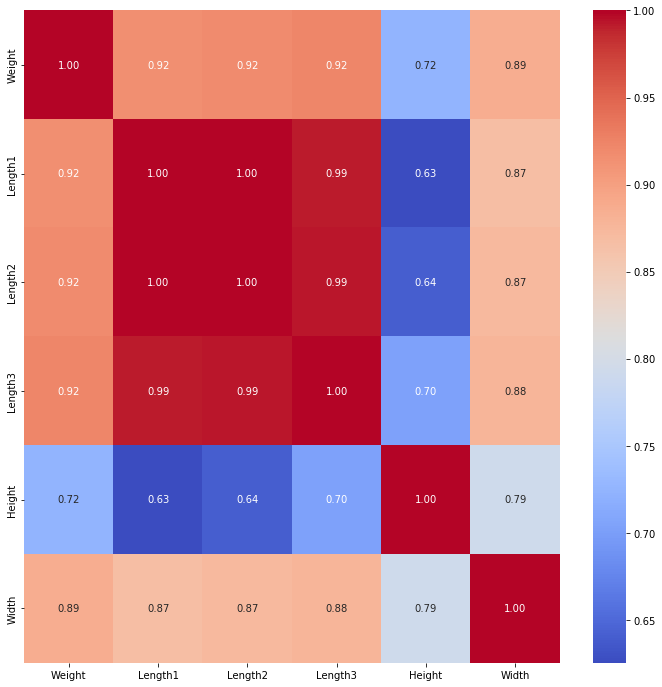

In [ ]:
# to check correlation of features
fig, ax = plt.subplots(figsize=(12,12)) 
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

plt.show()

### To check if there are any outliers

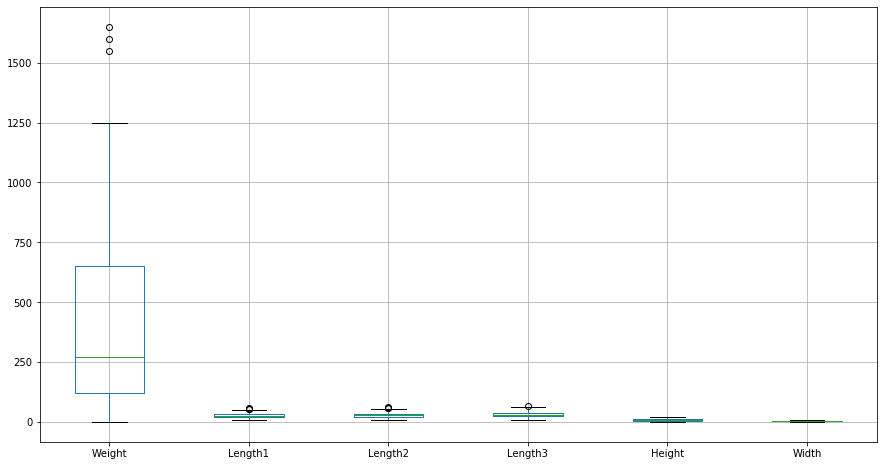

In [ ]:
plt.figure(figsize=(15,8))

columns2=['Weight','Length1', 'Length2', 'Length3', 'Height', 'Width']

boxplot = df.boxplot(column=columns2)  

In [ ]:
df = df[df['Weight']<1500]

#### there is no outlier find by looking at the graph from the above.

In [ ]:
"""Standardize the features """

'Standardize the features '

In [ ]:
df.shape
df1 = df.copy()
df1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Data Mapping the target (Alernatives) to digital format

In [ ]:
df1['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
df1['Species']=df1['Species'].map({"Bream":0, "Roach":1, "Whitefish":2, "Parkki":3, "Perch":4, "Pike":5, "Smelt":6})

In [ ]:
df1['Species'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [ ]:
df1.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  156 non-null    int64  
 1   Weight   156 non-null    float64
 2   Length1  156 non-null    float64
 3   Length2  156 non-null    float64
 4   Length3  156 non-null    float64
 5   Height   156 non-null    float64
 6   Width    156 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 9.8 KB


In [ ]:
data = df1.iloc[:,0:13]
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,6,12.2,11.5,12.2,13.4,2.0904,1.3936
155,6,13.4,11.7,12.4,13.5,2.4300,1.2690
156,6,12.2,12.1,13.0,13.8,2.2770,1.2558
157,6,19.7,13.2,14.3,15.2,2.8728,2.0672


### Neural Network

### Neural Network Model

In [ ]:
# Splict the data to training and testing

In [ ]:
from sklearn.utils import shuffle
df1 = shuffle(df1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 98 to 157
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  156 non-null    int64  
 1   Weight   156 non-null    float64
 2   Length1  156 non-null    float64
 3   Length2  156 non-null    float64
 4   Length3  156 non-null    float64
 5   Height   156 non-null    float64
 6   Width    156 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 9.8 KB


In [ ]:
# Creat dataset for split
# X = df1[['Length1', 'Height','Width']]
X= df1.drop(columns=['Species', 'Weight'])

y = df1.Species.values


In [ ]:
X[:5,:]

array([[-0.33615518, -0.326449  , -0.41001256, -0.51450127, -0.12593998],
       [-0.77618209, -0.79770187, -0.78521103, -0.63453535, -0.48086742],
       [ 0.77491278,  0.73899228,  0.77186263, -0.69940108,  0.00520798],
       [ 1.92998344,  1.86590132,  1.70047885, -0.26891164,  0.29654125],
       [-0.7321794 , -0.72598948, -0.69141142, -0.09593637, -0.64873202]])

In [ ]:
X[0,:]

array([-0.33615518, -0.326449  , -0.41001256, -0.51450127, -0.12593998])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X

array([[-3.36155177e-01, -3.26449001e-01, -4.10012562e-01,
        -5.14501273e-01, -1.25939984e-01],
       [-7.76182093e-01, -7.97701873e-01, -7.85211035e-01,
        -6.34535350e-01, -4.80867420e-01],
       [ 7.74912784e-01,  7.38992276e-01,  7.71862627e-01,
        -6.99401079e-01,  5.20798372e-03],
       [ 1.92998344e+00,  1.86590132e+00,  1.70047885e+00,
        -2.68911644e-01,  2.96541255e-01],
       [-7.32179401e-01, -7.25989479e-01, -6.91411416e-01,
        -9.59363674e-02, -6.48732019e-01],
       [-6.22172672e-01, -5.92809320e-01, -6.63271531e-01,
        -7.13645556e-01, -5.10384712e-01],
       [-2.92152486e-01, -2.85470490e-01, -2.41173249e-01,
         4.95743011e-01, -1.39018784e-01],
       [ 1.13793499e+00,  1.09755424e+00,  9.78221787e-01,
        -5.92776297e-01, -2.39209592e-01],
       [-4.02159215e-01, -4.49384533e-01, -3.63112753e-01,
        -4.72301430e-01, -4.46670558e-01],
       [-6.22172672e-01, -5.92809320e-01, -6.63271531e-01,
        -7.95423701e-01

In [ ]:
y

array([4, 1, 5, 5, 3, 4, 3, 5, 1, 4, 1, 3, 1, 1, 5, 4, 4, 4, 0, 6, 4, 0,
       5, 3, 2, 4, 0, 1, 0, 3, 0, 0, 1, 4, 4, 1, 4, 5, 5, 0, 0, 6, 6, 4,
       4, 0, 4, 0, 5, 5, 0, 0, 0, 4, 0, 6, 4, 0, 6, 3, 6, 4, 4, 4, 4, 2,
       4, 4, 5, 1, 4, 4, 0, 4, 4, 0, 1, 0, 2, 0, 4, 0, 4, 4, 4, 3, 0, 6,
       4, 1, 4, 6, 4, 4, 6, 1, 4, 0, 6, 4, 2, 0, 0, 0, 4, 5, 0, 0, 1, 4,
       0, 4, 2, 5, 4, 5, 0, 2, 1, 0, 0, 1, 5, 0, 4, 4, 4, 1, 6, 4, 4, 1,
       4, 1, 4, 4, 6, 1, 3, 4, 3, 0, 4, 4, 0, 4, 3, 6, 3, 0, 4, 4, 4, 1,
       4, 6], dtype=int64)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size = 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.25)

In [ ]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.80 (0.05)
LDA: 0.99 (0.01)
KNN: 0.74 (0.05)
NB: 0.55 (0.05)


In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.9871794871794872


In [9]:
# save model as pickle format
import pickle
data = {"model": model}
with open('picklemodel.pkl', 'wb') as file:
    pickle.dump(data, file)



NameError: name 'model' is not defined

In [11]:
# load the pickle format model and test
with open('picklemodel.pkl', 'rb') as file:

    data = pickle.load(file)

pickle_loaded = data["model"]

# scores = cross_val_score(pickle_loaded, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# print(np.mean(scores)) 


In [17]:
input =np.array([[60, 70, 30.0, 11.5200, 4.0200]])
prediction = pickle_loaded.predict(input)
prediction[0]

4

### Conclustion
LDA Model is the best for this solution

In [18]:
dic = {0: "Bream", 1: "Roach", 2: "Whitefish", 3: "Parkti", 4: "Perch", 5: "Pike", 6: "Smelt"}

In [20]:
num = 1
dic[num]

'Roach'